In [1]:
import pymongo
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as scs
import numpy as np
import pandas as pd

In [2]:
mc = pymongo.MongoClient() 

db = mc['movies_metadata']


In [3]:
mc.database_names()

['admin', 'local', 'movies_metadata', 'nyt_dump', 'tweets']

In [4]:
db.collection_names()

['test', 'movies', 'movies_backup', 'movies_clean_v2', 'movies_clean']

In [5]:
test = db['test']  # Use (or create) a collection called 'test'
movies = db['movies'] #Create a collection called movies
movies_clean_v2 = db['movies_clean_v2']

In [6]:
len(list(movies_clean_v2.find()))

1583

In [7]:
df_clean = pd.DataFrame(list(movies_clean_v2.find()))
df_clean.head()

,_id,data,title
0,5afb21667cfdd32058932636,"{'': '', 'Domestic Box Office': '620181382', '...",Star Wars Ep. VIII: The Last Jedi (2017)
1,5afb21677cfdd32058932637,"{'': '', 'Domestic Box Office': '504014165', '...",Beauty and the Beast (2017)
2,5afb21677cfdd32058932638,"{'': '', 'Domestic Box Office': '225764765', '...",The Fate of the Furious (2017)
3,5afb21677cfdd32058932639,"{'': '', 'Domestic Box Office': '264624300', '...",Despicable Me 3 (2017)
4,5afb21687cfdd3205893263a,"{'': '', 'Domestic Box Office': '404353892', '...",Jumanji: Welcome to the Jungle (2017)


In [8]:
df_clean_data = pd.DataFrame(list(df_clean['data']))
df_clean_data.head()

,,1st Assistant Director,3-D and Digital Image Producer,3D Animator,3D Stereoscopic Supervisor,ADR Editor,ADR Mixer,ADR Recording Engineer,ADR/Dialogue Editor,Action Choreographer,...,Visual Effects Supervisor: MPC,Visual Effects Supervisor: Milk Visual Effects,Visual Effects by,Wardrobe Supervisor,Worldwide Box Office,Written By,Written by,based on the novel “A Monster Calls” by,lead_cast,story based on a novel by
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1320214241,NaN,NaN,NaN,"[Mark Hamill, Carrie Fisher, Adam Driver, Dais...",NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1263109573,NaN,NaN,NaN,"[Emma Watson, Dan Stevens, Luke Evans, Kevin K...",NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1237466026,NaN,NaN,NaN,"[Vin Diesel, Dwayne Johnson, Jason Statham, Mi...",NaN
3,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1034542646,NaN,NaN,NaN,"[Steve Carell, Kristen Wiig, Trey Parker]",NaN
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,958513171,NaN,NaN,NaN,"[Dwayne Johnson, Jack Black, Kevin Hart, Karen...",NaN


In [9]:
# df_clean_data_trim = df_clean_data.loc[:, ['Worldwide Box Office', 'Domestic Box Office', 'International Box Office','Production Budget','Source']]
# df_clean_data_trim

In [10]:
# df_clean_data_trim['WW Aggregate'] = int(df_clean_data_trim['Domestic Box Office']) + int(df_clean_data_trim['International Box Office'])
# df_clean_data_trim

# df_clean_data_trim['Domestic Box Office'].fillna(0, inplace=True)
# df_clean_data_trim['International Box Office'].fillna(0, inplace=True)
# df_clean_data_trim['Production Budget'].fillna(10000000, inplace=True)

# df_clean_data_trim['Domestic Box Office'] = df_clean_data_trim['Domestic Box Office'].apply(pd.to_numeric)
# df_clean_data_trim['International Box Office'] = df_clean_data_trim['International Box Office'].apply(pd.to_numeric)
# df_clean_data_trim['ww_agg'] = df_clean_data_trim['Domestic Box Office'] + df_clean_data_trim['International Box Office']
# df_clean_data_trim['Production Budget'] = df_clean_data_trim['Production Budget'].apply(pd.to_numeric)

# df_clean_data_trim['log_ww_agg'] = df_clean_data_trim['ww_agg'].apply(np.log)
# df_clean_data_trim['log_budget'] = df_clean_data_trim['Production Budget'].apply(np.log)

# df_clean_data_trim.head()

In [160]:
df_clean_data_trim['Director'] = parse_directors(df_clean_data)

In [161]:
group_director = df_clean_data_trim.groupby('Director')

In [170]:
top_10_directors = group_director.mean().sort_values(by='ww_agg', ascending=False).head(10)

Text(0.5,1,'Top 10 average earnings of directors from 2015-2017')

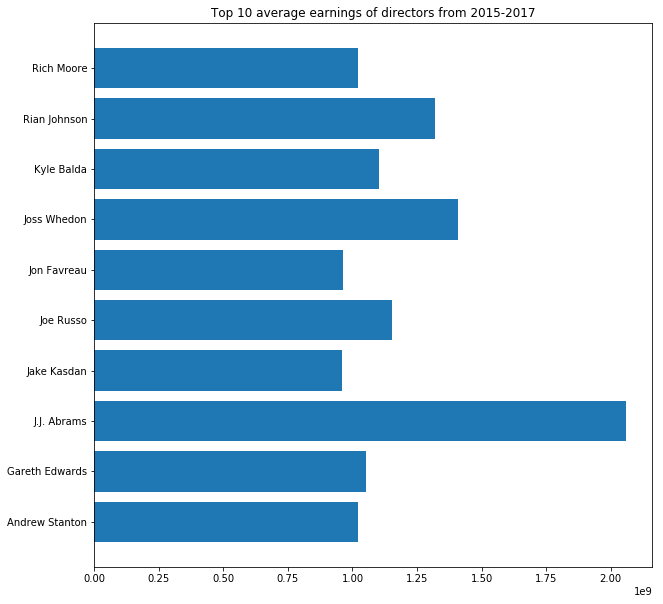

In [183]:
fig, ax = plt.subplots(1,figsize=(10,10))
ax.barh(top_10_directors.index, width = top_10_directors['ww_agg'] )
ax.set_title('Top 10 average earnings of directors from 2015-2017')

In [178]:
top_10_directors

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget,is_franchise
Director,,,,,,,
J.J. Abrams,936662225.0,1.122000e+09,306000000.0,2.058662e+09,21.445322,19.539096,1.0
Joss Whedon,459005868.0,9.492129e+08,330600000.0,1.408219e+09,21.065591,19.616420,1.0
Rian Johnson,620181382.0,7.000329e+08,10000000.0,1.320214e+09,21.001060,16.118096,1.0
Joe Russo,408084349.0,7.452201e+08,250000000.0,1.153304e+09,20.865897,19.336971,1.0
Kyle Balda,300335035.0,8.005590e+08,74500000.0,1.100894e+09,20.817569,18.126287,1.0
Gareth Edwards,532177324.0,5.188112e+08,200000000.0,1.050988e+09,20.772997,19.113828,1.0
Andrew Stanton,486295561.0,5.363218e+08,200000000.0,1.022617e+09,20.745631,19.113828,1.0
Rich Moore,341268248.0,6.786527e+08,150000000.0,1.019921e+09,20.742991,18.826146,0.0
Jon Favreau,364001123.0,5.999000e+08,175000000.0,9.639011e+08,20.686499,18.980297,0.0


In [9]:
# df_clean_data_trim['WW Aggregate'] = int(df_clean_data_trim['Domestic Box Office']) + int(df_clean_data_trim['International Box Office'])
# df_clean_data_trim
def create_ww(dataframe):
    dom = dataframe['Domestic Box Office'].fillna(0, inplace=False)
    intl = dataframe['International Box Office'].fillna(0, inplace=False)
    #nulls will be replaced with $25 mil for now, but might change depending on model results.
    budget = dataframe['Production Budget'].fillna(25000000, inplace=False)
    
    df = pd.DataFrame()
    
    dom_numeric = dom.apply(pd.to_numeric)
    intl_numeric = intl.apply(pd.to_numeric)
    
    df['ww_agg'] = dom_numeric + intl_numeric
    df['production_budget'] = budget.apply(pd.to_numeric)

    df['log_ww_agg'] = df['ww_agg'].apply(np.log)
    df['log_budget'] = df['production_budget'].apply(np.log)

    return df

In [12]:
df_x = create_ww(df_clean_data)
df_x

,ww_agg,production_budget,log_ww_agg,log_budget
0,1320214241,25000000,21.001060,17.034386
1,1263109573,160000000,20.956842,18.890684
2,1237466026,250000000,20.936332,19.336971
3,1034542646,75000000,20.757225,18.132999
4,958513171,90000000,20.680894,18.315320
5,880210429,175000000,20.595672,18.980297
6,863197744,200000000,20.576154,19.113828
7,850653412,180000000,20.561515,19.008467
8,817012815,150000000,20.521165,18.826146
9,800398408,175000000,20.500620,18.980297


In [10]:
def build_clean_dataset(dataframe):
    df = create_ww(dataframe)
    df['ratings'] = parse_mpaa_col(dataframe)
    df['runtime'] = parse_runtime_col(dataframe)
    df['is_franchise'] = create_franchise_dummy(dataframe)
    df['genre'] = parse_genre(dataframe)
    df['prod_method'] = parse_prod_method(dataframe)
    df['creative'] = parse_creative(dataframe)
    df['source'] = parse_source(dataframe)
    df['month'], df['day'], df['year'] = parse_release_date(dataframe)
    return df

def parse_mpaa_col(dataframe):
    ratings = dataframe.loc[:,'MPAA Rating']
    ratings = ratings.apply(lambda a: str(a))
    ratings = ratings.apply(lambda b: b.split()[0])
    ratings = ratings.apply(strip_text)
    return ratings

def strip_text(bad_text):
    if bad_text.endswith('(Rating'):
        bad_text = bad_text.replace('(Rating', '')
    return bad_text

def parse_runtime_col(dataframe):
    runtime = dataframe['Running Time']
    runtime = runtime.fillna(90) #This was the runtime with highest frequency
    runtime = runtime.apply(lambda x: str(x))
    runtime = runtime.apply(lambda x: x.split()[0])
    runtime = runtime.apply(int)
    return runtime

def create_franchise_dummy(dataframe):
    franchise = dataframe['Franchise'].isna() ^ 1
    return franchise

def parse_genre(dataframe):
    genre = dataframe['Genre']
    return genre

def parse_prod_method(dataframe):
    prod_method = dataframe['Production Method']
    return prod_method

def parse_creative(dataframe):
    creative = dataframe['Creative Type']
    return creative

def parse_source(dataframe):
    source = dataframe['Source']
    return source

def parse_release_date(dataframe):
    months = []
    days = []
    years = []
    for date in dataframe['Domestic Releases']:
        if date == date: #checking if null. if true then not null
            month = list(date.split(' '))[0]
            day = list(date.split(' '))[1]
            year = list(date.split(' '))[2]
        else:
            month = None
            day = None
            year = None
        months.append(month)
        days.append(day)
        years.append(year)
    return months, days, years

def parse_directors(dataframe):
    
    director = []
    for i in range(len(dataframe['Director'])):
        if type(dataframe['Director'][i]) == list:
            director.append(dataframe['Director'][i][1])
        else:
            director.append(dataframe['Director'][i])
    return pd.Series(director)


In [11]:
df_ready_for_model = build_clean_dataset(df_clean_data)

In [12]:
df_ready_for_model.head()

,ww_agg,production_budget,log_ww_agg,log_budget,ratings,runtime,is_franchise,genre,prod_method,creative,source,month,day,year
0,1320214241,25000000,21.001060,17.034386,PG-13,150,True,Adventure,Live Action,Science Fiction,Original Screenplay,December,15th,2017
1,1263109573,160000000,20.956842,18.890684,PG,123,False,Musical,Animation/Live Action,Fantasy,Remake,March,17th,2017
2,1237466026,250000000,20.936332,19.336971,PG-13,136,True,Action,Live Action,Contemporary Fiction,Original Screenplay,April,14th,2017
3,1034542646,75000000,20.757225,18.132999,PG,90,True,Adventure,Digital Animation,Kids Fiction,Original Screenplay,June,30th,2017
4,958513171,90000000,20.680894,18.315320,PG-13,119,True,Adventure,Live Action,Fantasy,Original Screenplay,December,20th,2017


In [13]:
import pymc3 as pm

In [17]:
with pm.Model() as model:
    sd = pm.HalfNormal('sd', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    observed = pm.Normal('observed', intercept + beta_runtime * df_ready_for_model.runtime, sd, observed=df_ready_for_model.log_ww_agg)
    

In [18]:
with model:
    trace = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_runtime, intercept, sd_log__]
 15%|█▌        | 1674/11000 [00:05<00:28, 323.01it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '4905' (I am process '4906')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ryan/.theano/compiledir_Linux-4.13--generic-x86_64-with-debian-stretch-sid-x86_64-3.6.4-64/lock_dir
 16%|█▌        | 1716/11000 [00:05<00:28, 324.54it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '4905' (I am process '4907')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ryan/.theano/compiledir_Linux-4.13--generic-x86_64-with-debian-stretch-sid-x86_64-3.6.4-64/lock_dir
 37%|███▋      | 4028/11000 [00:11<00:19, 360.78it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '4906' (I am process '4907')
INFO (theano.gof.compilelock): To manuall

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30681165c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f306801bcc0>]], dtype=object)

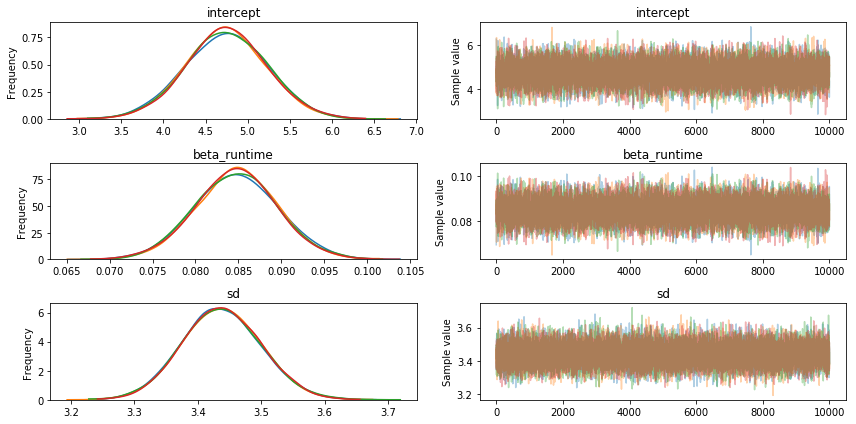

In [19]:
pm.traceplot(trace)

In [25]:
trace[200]

{'beta_runtime': 0.084974312560418819,
 'intercept': 4.8592795858393369,
 'sd': 3.4412928811676826,
 'sd_log__': 1.2358472383248116}

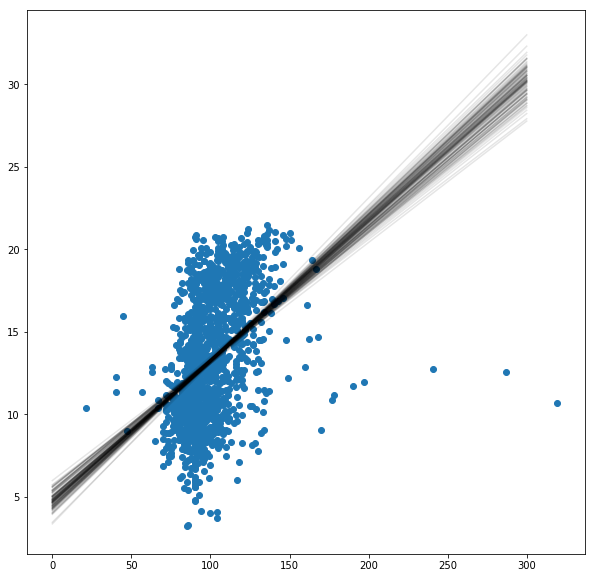

In [26]:
fig, ax = plt.subplots(1, figsize=(10,10))
for i, point in enumerate(trace):
    if i % 100 == 0:
        ax.plot([0,300],[point['intercept'],point['intercept'] + point['beta_runtime'] * 300], 'k', alpha=.1)
        
# ax.plot([0,300],[4.7,4.7 + .085 * 300])
ax.scatter(df_ready_for_model.runtime, df_ready_for_model.log_ww_agg)

In [14]:
df_ready_for_model.head()

,ww_agg,production_budget,log_ww_agg,log_budget,ratings,runtime,is_franchise,genre,prod_method,creative,source,month,day,year
0,1320214241,25000000,21.001060,17.034386,PG-13,150,True,Adventure,Live Action,Science Fiction,Original Screenplay,December,15th,2017
1,1263109573,160000000,20.956842,18.890684,PG,123,False,Musical,Animation/Live Action,Fantasy,Remake,March,17th,2017
2,1237466026,250000000,20.936332,19.336971,PG-13,136,True,Action,Live Action,Contemporary Fiction,Original Screenplay,April,14th,2017
3,1034542646,75000000,20.757225,18.132999,PG,90,True,Adventure,Digital Animation,Kids Fiction,Original Screenplay,June,30th,2017
4,958513171,90000000,20.680894,18.315320,PG-13,119,True,Adventure,Live Action,Fantasy,Original Screenplay,December,20th,2017


In [15]:
df_dummies_ratings = pd.get_dummies(df_ready_for_model.ratings)
df_dummies_ratings

,G,Not,PG,PG-13,R,nan
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,0,1,0,0,0


In [16]:
df_dummies_genre = pd.get_dummies(df_ready_for_model.genre)
df_dummies_genre

,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Multiple Genres,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
df_dummies_prod_method = pd.get_dummies(df_ready_for_model.prod_method)
df_dummies_prod_method

,Animation/Live Action,Digital Animation,Hand Animation,Live Action,Multiple Production Methods,Stop-Motion Animation
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0


In [18]:
df_dummies_creative = pd.get_dummies(df_ready_for_model.creative)
df_dummies_creative

,Contemporary Fiction,Dramatization,Factual,Fantasy,Historical Fiction,Kids Fiction,Multiple Creative Types,Science Fiction,Super Hero
0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0


In [19]:
df_dummies_source = pd.get_dummies(df_ready_for_model.source)
df_dummies_source

,Based on Comic/Graphic Novel,Based on Factual Book/Article,Based on Fiction Book/Short Story,Based on Folk Tale/Legend/Fairytale,Based on Game,Based on Movie,Based on Musical Group,Based on Musical or Opera,Based on Play,Based on Real Life Events,Based on Religious Text,Based on Short Film,Based on TV,Based on Theme Park Ride,Based on Toy,Based on Web Series,Compilation,Original Screenplay,Remake,Spin-Off
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df_dummies_month = pd.get_dummies(df_ready_for_model.month)
df_dummies_month

,April,August,December,Fall,February,January,July,June,March,May,November,October,September
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
df_with_dummies = df_ready_for_model[['log_ww_agg', 'log_budget', 'runtime', 'is_franchise']]

In [22]:
df_with_all_dummies = pd.concat([df_with_dummies, df_dummies_ratings, df_dummies_genre, df_dummies_prod_method, df_dummies_creative,
          df_dummies_source, df_dummies_month], axis =1)
df_with_all_dummies

,log_ww_agg,log_budget,runtime,is_franchise,G,Not,PG,PG-13,R,nan,...,Fall,February,January,July,June,March,May,November,October,September
0,21.001060,17.034386,150,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.956842,18.890684,123,False,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,20.936332,19.336971,136,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.757225,18.132999,90,True,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20.680894,18.315320,119,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,20.595672,18.980297,133,True,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,20.576154,19.113828,136,True,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,20.561515,19.008467,130,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,20.521165,18.826146,141,True,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,20.500620,18.980297,105,False,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
len(df_with_all_dummies.columns)

71

In [124]:
with pm.Model() as model_2:
    sd = pm.HalfNormal('sd', 100)
#     sd_log_budget = pm.HalfNormal('sd_log_budget', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    beta_log_budget = pm.Normal('beta_log_budget', 17, 5)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime
                                                     + beta_log_budget * df_ready_for_model.log_budget, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)


In [125]:
with model_2:
    trace = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_log_budget, beta_runtime, intercept, sd_log__]
100%|██████████| 11000/11000 [02:17<00:00, 80.14it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3044a3e160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3044d869e8>]], dtype=object)

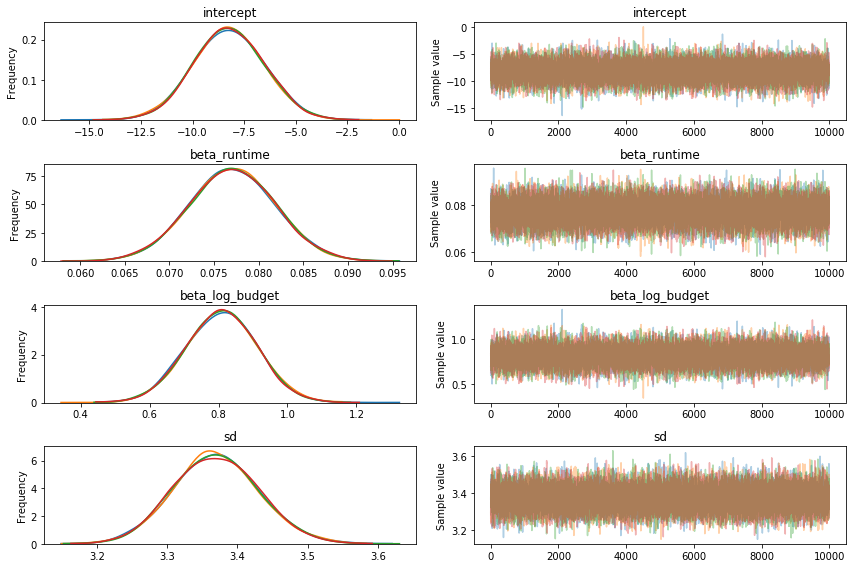

In [126]:
pm.traceplot(trace)

In [24]:
summary(trace)

NameError: name 'summary' is not defined

In [40]:
model_2.sd

sd

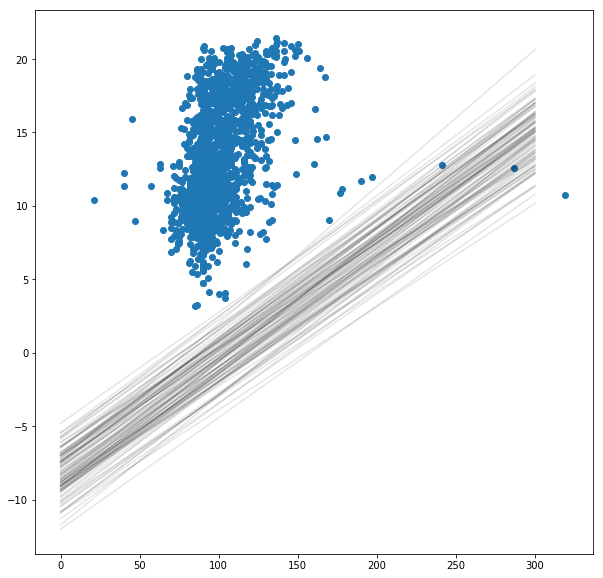

In [41]:
fig, ax = plt.subplots(1, figsize=(10,10))
for i, point in enumerate(trace):
    if i % 100 == 0:
        ax.plot([0,300],[point['intercept'], point['intercept'] + point['beta_runtime'] * 300], 'k', alpha=.1)
        
# ax.plot([0,300],[4.7,4.7 + .085 * 300])
ax.scatter(df_ready_for_model.runtime, df_ready_for_model.log_ww_agg)

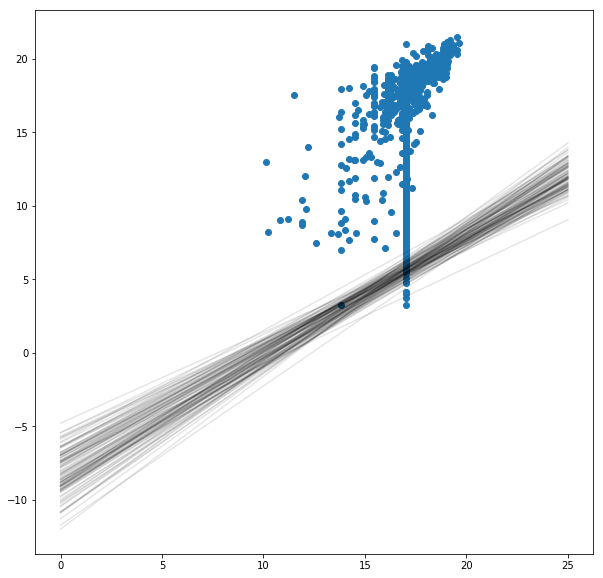

In [42]:
fig, ax = plt.subplots(1, figsize=(10,10))
for i, point in enumerate(trace):
    if i % 100 == 0:
        ax.plot([0,25],[point['intercept'],point['intercept'] + point['beta_log_budget'] * 25], 'k', alpha=.1)

# ax.plot([0,300],[4.7,4.7 + .085 * 300])
ax.scatter(df_ready_for_model.log_budget, df_ready_for_model.log_ww_agg)

Text(0.5,1,'Frequencies of log(budget)')

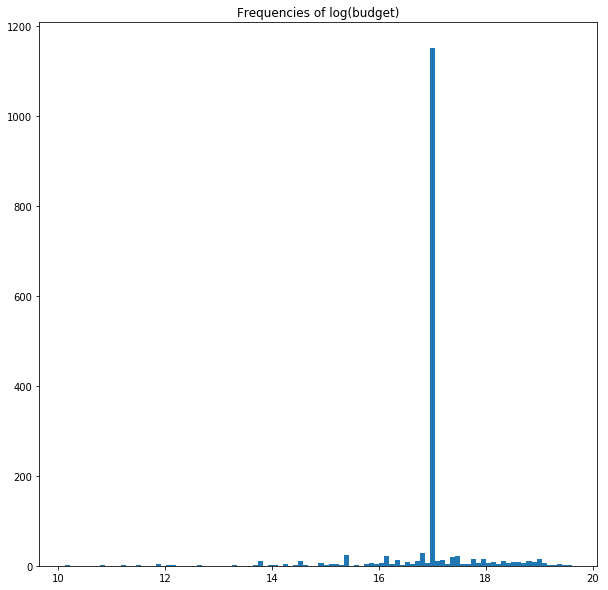

In [43]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_ready_for_model['log_budget'], bins = 100)
ax.set_title('Frequencies of log(budget)')

Text(0.5,1,'Frequencies of log(revenue)')

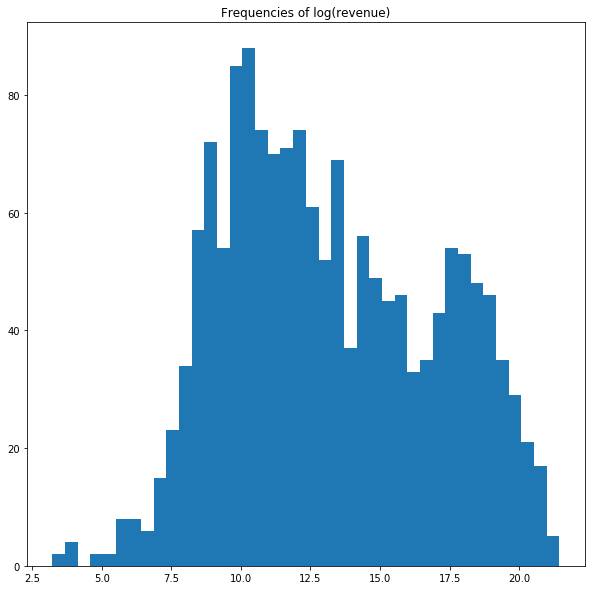

In [189]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_ready_for_model['log_ww_agg'], bins = 40)
ax.set_title('Frequencies of log(revenue)')

In [45]:
from pymc3 import summary

In [46]:
summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,-8.252114,1.681781,0.011792,-11.532676,-4.926756,14993.941633,1.000082
beta_runtime,0.077060,0.004732,0.000030,0.067725,0.086255,26259.501175,1.000106
beta_log_budget,0.810446,0.100313,0.000715,0.607470,1.002873,14836.150607,1.000170
sd,3.369379,0.060270,0.000387,3.251952,3.487024,26622.372731,1.000031


In [25]:
df_clean_data['Domestic Releases']

0       December 15th 2017 (Wide) by Walt DisneyDecemb...
1       March 17th 2017 (Wide) by Walt DisneyMarch 17t...
2       April 14th 2017 (Wide) by UniversalApril 14th ...
3                      June 30th 2017 (Wide) by Universal
4              December 20th 2017 (Wide) by Sony Pictures
5       July 7th 2017 (Wide) by Sony PicturesJuly 7th ...
6                      May 5th 2017 (Wide) by Walt Disney
7                 November 3rd 2017 (Wide) by Walt Disney
8                    June 2nd 2017 (Wide) by Warner Bros.
9                November 22nd 2017 (Wide) by Walt Disney
10      May 26th 2017 (Wide) by Walt DisneyMay 26th 20...
11              September 8th 2017 (Wide) by Warner Bros.
12              November 17th 2017 (Wide) by Warner Bros.
13              March 3rd 2017 (Wide) by 20th Century Fox
14      June 21st 2017 (Wide) by Paramount PicturesJun...
15      March 10th 2017 (Wide) by Warner Bros.March 10...
16             March 31st 2017 (Wide) by 20th Century Fox
17      July 2

In [26]:
mo, da, ye = parse_release_date(df_clean_data)

In [27]:
def parse_day(day_column):
    days = []
    for day in day_column:
        if day == None:
            day_clean = None
        else:
            day_clean = day.strip('abcdefghijklmnopqrstuvwxyz')
        days.append(day_clean)
    return days

In [28]:
days_clean = parse_day(da)

In [29]:
np.array(mo) + np.array(days_clean)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [30]:
df_with_all_dummies.columns

Index(['log_ww_agg', 'log_budget', 'runtime', 'is_franchise', 'G', 'Not', 'PG',
       'PG-13', 'R', 'nan', 'Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror',
       'Multiple Genres', 'Musical', 'Romantic Comedy', 'Thriller/Suspense',
       'Western', 'Animation/Live Action', 'Digital Animation',
       'Hand Animation', 'Live Action', 'Multiple Production Methods',
       'Stop-Motion Animation', 'Contemporary Fiction', 'Dramatization',
       'Factual', 'Fantasy', 'Historical Fiction', 'Kids Fiction',
       'Multiple Creative Types', 'Science Fiction', 'Super Hero',
       'Based on Comic/Graphic Novel', 'Based on Factual Book/Article',
       'Based on Fiction Book/Short Story',
       'Based on Folk Tale/Legend/Fairytale', 'Based on Game',
       'Based on Movie', 'Based on Musical Group', 'Based on Musical or Opera',
       'Based on Play', 'Based on Real Life Events', 'Based on Religious Text',
       'Based on Shor

In [31]:
df_clean_data['lead_cast']


0       [Mark Hamill, Carrie Fisher, Adam Driver, Dais...
1       [Emma Watson, Dan Stevens, Luke Evans, Kevin K...
2       [Vin Diesel, Dwayne Johnson, Jason Statham, Mi...
3               [Steve Carell, Kristen Wiig, Trey Parker]
4       [Dwayne Johnson, Jack Black, Kevin Hart, Karen...
5       [Tom Holland, Michael Keaton, Zendaya, Jon Fav...
6       [Chris Pratt, Zoe Saldana, Dave Bautista, Vin ...
7       [Chris Hemsworth, Tom Hiddleston, Cate Blanche...
8                                 [Gal Gadot, Chris Pine]
9       [Anthony Gonzalez, Gael Garcia Bernal, Benjami...
10            [Johnny Depp, Javier Bardem, Geoffrey Rush]
11                     [Jaeden Lieberher, Bill Skarsgård]
12      [Ben Affleck, Henry Cavill, Gal Gadot, Jason M...
13                             [Hugh Jackman, Dafne Keen]
14                          [Mark Wahlberg, Peter Cullen]
15       [Tom Hiddleston, Samuel L. Jackson, Brie Larson]
16                                         [Alec Baldwin]
17            

In [109]:
df_clean_data['Producer']


0                         [Kathleen Kennedy, Ram Bergman]
1                        [David Hoberman, Todd Lieberman]
2       [Neal H. Moritz, Vin Diesel, Michael Fottrell,...
3                   [Christopher Meledandri, Janet Healy]
4                         [Matt Tolmach, William Teitler]
5                               [Kevin Feige, Amy Pascal]
6                                             Kevin Feige
7                                             Kevin Feige
8       [Charles Roven, Zack Snyder, Deborah Snyder, R...
9                                      Darla K. Anderson*
10                                      Jerry Bruckheimer
11      [Dan Lin, Roy Lee, David Katzenberg, Barbara M...
12      [Charles Roven, Deborah Snyder, Geoff Johns, J...
13      [Simon Kinberg, Hutch Parker, Lauren Shuler Do...
14      [Don Murphy, Tom DeSanto, Lorenzo di Bonaventu...
15      [Thomas Tull, Mary Parent, Jon Jashni, Alex Ga...
16                                       Ramsey Ann Naito
17            

In [ ]:
# pm.gp.Marginal(cov_func = pm.)

In [32]:
with pm.Model() as model_3:
#     sd = pm.HalfNormal('sd', 100)
#     intercept = pm.Normal('intercept', 0, 100)
    pm.glm.GLM.from_formula('log_ww_agg ~  is_franchise ', df_ready_for_model)
    trace=pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_log__, is_franchise[T.True], Intercept]
  0%|          | 0/11000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [33]:
#Generate fake data
xmin = 0
xmax = 40
n_x1es = 200
n_x2es = 200
x1es = scs.uniform(xmin, xmax).rvs(n_x1es)
x2es = scs.uniform(xmin, xmax).rvs(n_x2es)
yes = x1es + x2es +scs.norm(0, 10).rvs(n_x1es)
df = pd.DataFrame({'x1': x1es, 'x2': x2es, 'y': yes})
# fig, ax = plt.subplots()
# ax.scatter(df.x1, df.y)

In [34]:
df.head()

,x1,x2,y
0,11.384386,14.703990,28.081336
1,16.910630,35.175403,63.511283
2,2.958231,9.978069,8.286500
3,35.859393,34.088466,78.100690
4,34.800675,20.655466,57.558669


In [134]:
len(df)

200

In [133]:
with pm.Model() as model:
   pm.glm.GLM.from_formula('y ~ x1 + x2', df)
   trace = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_log__, x2, x1, Intercept]
100%|██████████| 11000/11000 [00:19<00:00, 564.73it/s]


In [135]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-2.396811,1.842704,0.014017,-5.888406,1.388527,17535.437876,1.000005
x1,1.154329,0.058320,0.000387,1.039596,1.268364,22062.932626,1.000011
x2,0.955912,0.060444,0.000412,0.836008,1.074241,22484.478788,0.999981
sd,9.984739,0.504267,0.002674,9.005870,10.987519,30643.354817,0.999985


In [38]:
df_with_all_dummies.head()

,log_ww_agg,log_budget,runtime,is_franchise,G,Not,PG,PG-13,R,nan,...,Fall,February,January,July,June,March,May,November,October,September
0,21.001060,17.034386,150,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.956842,18.890684,123,False,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,20.936332,19.336971,136,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.757225,18.132999,90,True,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20.680894,18.315320,119,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_experiment_2 = df_ready_for_model.iloc[:200,:]

In [41]:
%%time
with pm.Model() as model_4:
   pm.glm.GLM.from_formula('log_ww_agg ~ runtime', df_experiment_2)
   trace_4 = pm.sample(10000, tune = 1000, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_log__, runtime, Intercept]
100%|██████████| 11000/11000 [00:35<00:00, 307.55it/s]


CPU times: user 1.36 s, sys: 164 ms, total: 1.53 s
Wall time: 37 s


In [136]:
pm.summary(trace_4)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,11.764157,0.848958,0.007403,10.068974,13.398843,15084.050722,1.000126
runtime,0.049310,0.007798,0.000067,0.034139,0.064668,15107.044005,1.000110
sd,1.830141,0.091922,0.000664,1.654350,2.011555,18613.102509,1.000197


In [124]:
df_experiment_3 = df_ready_for_model.iloc[:255,:]

In [176]:
with pm.Model() as model_5:
    sd = pm.HalfNormal('sd', 100)
#     sd_log_budget = pm.HalfNormal('sd_log_budget', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime,
#                                                      + beta_log_budget * df_ready_for_model.log_budget, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)


In [177]:
with model_5:
    trace_5 = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_runtime, intercept, sd_log__]
100%|██████████| 11000/11000 [00:33<00:00, 332.78it/s]


In [178]:
pm.summary(trace_5)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,4.752788,0.478223,0.004607,3.831104,5.704529,14386.363731,1.000014
beta_runtime,0.084721,0.004731,0.000045,0.075565,0.094095,14412.426515,1.000027
sd,3.438254,0.061213,0.000454,3.319377,3.558914,21034.370935,1.000033


In [141]:
with pm.Model() as model_6:
    sd = pm.HalfNormal('sd', 100)
#     sd_log_budget = pm.HalfNormal('sd_log_budget', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    beta_log_budget = pm.Normal('beta_log_budget', 0, 100)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime
                                                      + beta_log_budget * df_ready_for_model.log_budget, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)

In [142]:
with model_6:
    trace_6 = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_log_budget, beta_runtime, intercept, sd_log__]
100%|██████████| 11000/11000 [01:54<00:00, 96.16it/s]


In [143]:
pm.summary(trace_6)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,-8.129053,1.651695,0.012053,-11.363288,-4.919881,16568.453964,1.000141
beta_runtime,0.077110,0.004724,0.000026,0.067899,0.086441,28074.229192,1.000024
beta_log_budget,0.802932,0.098836,0.000710,0.603472,0.990025,16248.220611,1.000096
sd,3.369104,0.059825,0.000385,3.250787,3.485040,26723.455085,0.999991


In [171]:
with pm.Model() as model_7:
    sd = pm.HalfNormal('sd', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    beta_log_budget = pm.Normal('beta_log_budget', 0, 100)
    beta_is_franchise = pm.Normal('beta_is_franchise', 0, 100)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime
                                                      + beta_log_budget * df_ready_for_model.log_budget
                                                      + beta_is_franchise * df_ready_for_model.is_franchise, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)

In [172]:
with model_7:
    trace_7 = pm.sample(1000, cores = 4, start = pm.find_MAP())

logp = -4,090.4, ||grad|| = 79.486: 100%|██████████| 46/46 [00:00<00:00, 2321.87it/s]      
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_is_franchise, beta_log_budget, beta_runtime, intercept, sd_log__]
100%|██████████| 1500/1500 [00:24<00:00, 60.50it/s]


In [173]:
pm.summary(trace_7)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,-1.986554,1.637025,0.042394,-4.939411,1.398792,1447.359728,1.000171
beta_runtime,0.068201,0.004607,0.000091,0.058934,0.077026,2360.861372,0.999814
beta_log_budget,0.470539,0.097352,0.002515,0.274023,0.648131,1489.952789,1.000360
beta_is_franchise,4.287325,0.283103,0.005728,3.769299,4.867770,2552.574969,0.999691
sd,3.156973,0.055448,0.000857,3.045243,3.260449,3107.810193,1.000553


(100, 800000)


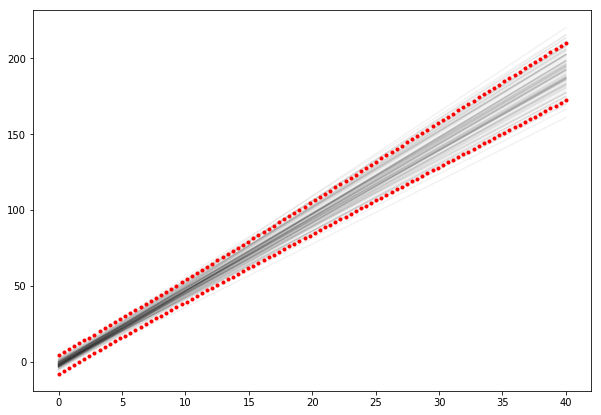

In [174]:
n_xpts = 100
n_rnd = 200
xmin = 0
xmax = 40
fix, ax = plt.subplots(figsize=(10,7))
# ax.scatter(df.x, df.y)
for i, point in enumerate(trace_7):
   if i%10 == 0:
       ax.plot([xmin, xmax],
               [point['intercept'] + point['beta_runtime']*xmin + point['beta_log_budget']*xmin + point['beta_is_franchise']*xmin,
                point['intercept'] + point['beta_runtime']*xmax + point['beta_log_budget']*xmax + point['beta_is_franchise']*xmax],
               'k', alpha=0.05)

xpts = np.linspace(xmin, xmax, n_xpts).reshape(-1, 1, 1)
rnd = scs.norm(0,1).rvs(n_rnd).reshape(-1, 1)
ypts = trace_7['intercept'] + xpts * trace_7['beta_runtime'] + xpts * trace_7['beta_log_budget'] + xpts * trace_7['beta_is_franchise'] + rnd*trace_7['sd']
ypts = ypts.reshape(n_xpts, -1)
xpts = xpts.reshape(-1)
print (ypts.shape)
for xpt, ypt in zip(xpts, ypts):
   ax.plot([xpt], [np.percentile(ypt, 95)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 5)], 'r.')

(100, 8000000)


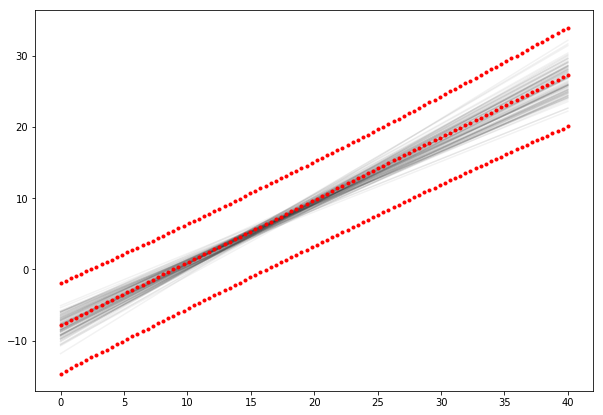

In [175]:
n_xpts = 100
n_rnd = 200
xmin = 0
xmax = 40
fix, ax = plt.subplots(figsize=(10,7))
# ax.scatter(df.x, df.y)
for i, point in enumerate(trace_6):
   if i%100 == 0:
       ax.plot([xmin, xmax],
               [point['intercept'] + point['beta_runtime']*xmin + point['beta_log_budget']*xmin,
                point['intercept'] + point['beta_runtime']*xmax + point['beta_log_budget']*xmax],
               'k', alpha=0.05)

xpts = np.linspace(xmin, xmax, n_xpts).reshape(-1, 1, 1)
rnd = scs.norm(0,1).rvs(n_rnd).reshape(-1, 1)
ypts = trace_6['intercept'] + xpts * trace_6['beta_runtime'] + xpts * trace_6['beta_log_budget'] + rnd*trace_6['sd']
ypts = ypts.reshape(n_xpts, -1)
xpts = xpts.reshape(-1)
print (ypts.shape)
for xpt, ypt in zip(xpts, ypts):
   ax.plot([xpt], [np.percentile(ypt, 95)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 50)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 5)], 'r.')

In [181]:
with pm.Model() as model_5:
    sd = pm.HalfNormal('sd', 100)
#     sd_log_budget = pm.HalfNormal('sd_log_budget', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime,
#                                                      + beta_log_budget * df_ready_for_model.log_budget, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)


In [182]:
with model_5:
    trace_5 = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_runtime, intercept, sd_log__]
100%|██████████| 11000/11000 [00:32<00:00, 334.80it/s]


In [183]:
pm.summary(trace_5)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,4.747462,0.476973,0.004793,3.815082,5.690232,13279.194295,1.000154
beta_runtime,0.084771,0.004714,0.000047,0.075687,0.094193,13190.520233,1.000151
sd,3.437191,0.060970,0.000349,3.320523,3.558370,22259.360307,0.999960


(100, 8000000)


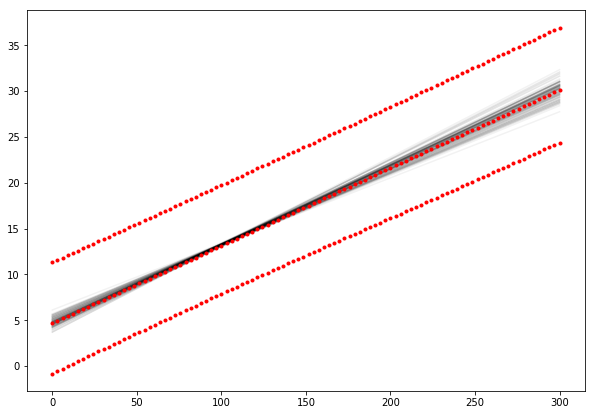

In [185]:
n_xpts = 100
n_rnd = 200
xmin = 0
xmax = 300
fix, ax = plt.subplots(figsize=(10,7))
# ax.scatter(df.x, df.y)
for i, point in enumerate(trace_5):
   if i%100 == 0:
       ax.plot([xmin, xmax],
               [point['intercept'] + point['beta_runtime']*xmin,
                point['intercept'] + point['beta_runtime']*xmax ],
               'k', alpha=0.05)

xpts = np.linspace(xmin, xmax, n_xpts).reshape(-1, 1, 1)
rnd = scs.norm(0,1).rvs(n_rnd).reshape(-1, 1)
ypts = trace_5['intercept'] + xpts * trace_5['beta_runtime'] + rnd*trace_5['sd']
ypts = ypts.reshape(n_xpts, -1)
xpts = xpts.reshape(-1)
print (ypts.shape)
for xpt, ypt in zip(xpts, ypts):
   ax.plot([xpt], [np.percentile(ypt, 95)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 50)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 5)], 'r.')

In [186]:
df_ready_for_model.head()

,ww_agg,production_budget,log_ww_agg,log_budget,ratings,runtime,is_franchise,genre,prod_method,creative,source,month,day,year
0,1320214241,25000000,21.001060,17.034386,PG-13,150,True,Adventure,Live Action,Science Fiction,Original Screenplay,December,15th,2017
1,1263109573,160000000,20.956842,18.890684,PG,123,False,Musical,Animation/Live Action,Fantasy,Remake,March,17th,2017
2,1237466026,250000000,20.936332,19.336971,PG-13,136,True,Action,Live Action,Contemporary Fiction,Original Screenplay,April,14th,2017
3,1034542646,75000000,20.757225,18.132999,PG,90,True,Adventure,Digital Animation,Kids Fiction,Original Screenplay,June,30th,2017
4,958513171,90000000,20.680894,18.315320,PG-13,119,True,Adventure,Live Action,Fantasy,Original Screenplay,December,20th,2017
